In [1]:
library(edgeR)
library(ggplot2)
library(tidyr)

Loading required package: limma

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"


## Load data

In [2]:
list.files("../../results/DiffExpr/pseudobulks/")

[1] "annotation_chimp.csv"                  
 [2] "annotation_human.csv"                  
 [3] "annotation_macaque.csv"                
 [4] "annotation_spatial_libd_human.csv"     
 [5] "expression_chimp.csv"                  
 [6] "expression_human.csv"                  
 [7] "expression_macaque.csv"                
 [8] "expression_mean_chimp.csv"             
 [9] "expression_mean_human.csv"             
[10] "expression_mean_macaque.csv"           
[11] "expression_mean_spatial_libd_human.csv"
[12] "expression_spatial_libd_human.csv"     
[13] "expression_sum_chimp.csv"              
[14] "expression_sum_human.csv"              
[15] "expression_sum_macaque.csv"            
[16] "expression_sum_spatial_libd_human.csv"

### Expression table

In [3]:
expression_human <- read.csv('../../results/DiffExpr/pseudobulks/expression_sum_human.csv')
head(expression_human)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.human_j4,L1.human_j4,L6.human_j4,WM.human_j6,L2.human_j6,L3.human_j6,L5.human_j6,L6.human_j6,L1.human_j6,L4.human_j6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,OR4F29,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F16,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,SAMD11,1,4,1,4,6,4,0,9,5,⋯,1,5,0,0,0,1,7,0,0,4
5,NOC2L,25,75,75,217,37,94,91,115,414,⋯,156,48,82,62,43,163,361,145,18,205
6,KLHL17,5,31,12,61,14,30,35,40,179,⋯,23,6,20,13,10,49,81,43,1,42


In [4]:
expression_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/expression_sum_spatial_libd_human.csv')
head(expression_human_libd)

,X,L1.151507,L3.151507,WM.151507,L6.151507,L5.151507,L2.151507,L4.151507,L3.151508,L1.151508,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,1,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,AL627309.1,2,1,0,0,1,0,2,1,1,⋯,0,1,1,2,1,0,0,2,1,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Merge two tables

In [5]:
expression <- merge(expression_human, expression_human_libd, by='X')
rownames(expression) <- expression$X
expression <- expression[,2:ncol(expression)]
head(expression)

,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,L4.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,48,106,183,517,72,171,207,90,481,172,⋯,46,27,54,116,14,110,59,78,52,37
A1CF,0,0,1,13,1,0,0,0,5,1,⋯,0,0,0,0,0,0,0,0,0,0
A2M,107,207,173,564,282,248,256,226,360,134,⋯,139,101,172,401,98,210,209,321,107,113
A2ML1,1,1,4,3,5,1,7,1,1,2,⋯,1,1,0,2,0,4,0,3,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,4,11,2,1,2,4,3,5,⋯,5,2,1,9,1,3,5,7,6,1


In [6]:
nrow(expression)

[1] 19404

### Annotation table

In [7]:
annotation_human <- read.csv('../../results/DiffExpr/pseudobulks/annotation_human.csv', row.names=1)
head(annotation_human)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [8]:
annotation_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/annotation_spatial_libd_human.csv', row.names=1)
head(annotation_human_libd)

,layer,sample_id,condition
,<chr>,<int>,<chr>
L1.151507,L1,151507,spatial_libd_human
L3.151507,L3,151507,spatial_libd_human
WM.151507,WM,151507,spatial_libd_human
L6.151507,L6,151507,spatial_libd_human
L5.151507,L5,151507,spatial_libd_human
L2.151507,L2,151507,spatial_libd_human


In [9]:
annotation = rbind(annotation_human, annotation_human_libd)
head(annotation, 3)
tail(annotation, 3)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human


,layer,sample_id,condition
,<chr>,<chr>,<chr>
L5.151676,L5,151676,spatial_libd_human
L2.151676,L2,151676,spatial_libd_human
L4.151676,L4,151676,spatial_libd_human


## Fit model

### Factor

In [10]:
head(annotation)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [11]:
annotation$condition <- factor(annotation$condition, levels=c("human", "spatial_libd_human"))
annotation$condition <- relevel(annotation$condition, ref="spatial_libd_human")
annotation$layer <- factor(annotation$layer)
annotation$sample_id <- factor(annotation$sample_id)
head(annotation)

,layer,sample_id,condition
,<fct>,<fct>,<fct>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [12]:
head(expression)

,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,L4.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,48,106,183,517,72,171,207,90,481,172,⋯,46,27,54,116,14,110,59,78,52,37
A1CF,0,0,1,13,1,0,0,0,5,1,⋯,0,0,0,0,0,0,0,0,0,0
A2M,107,207,173,564,282,248,256,226,360,134,⋯,139,101,172,401,98,210,209,321,107,113
A2ML1,1,1,4,3,5,1,7,1,1,2,⋯,1,1,0,2,0,4,0,3,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,4,11,2,1,2,4,3,5,⋯,5,2,1,9,1,3,5,7,6,1


In [13]:
group <- annotation$condition
de_exp_table <- DGEList(counts=expression, group=group)
de_exp_table

,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,L4.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
A1BG,48,106,183,517,72,171,207,90,481,172,⋯,46,27,54,116,14,110,59,78,52,37
A1CF,0,0,1,13,1,0,0,0,5,1,⋯,0,0,0,0,0,0,0,0,0,0
A2M,107,207,173,564,282,248,256,226,360,134,⋯,139,101,172,401,98,210,209,321,107,113
A2ML1,1,1,4,3,5,1,7,1,1,2,⋯,1,1,0,2,0,4,0,3,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,4,11,2,1,2,4,3,5,⋯,5,2,1,9,1,3,5,7,6,1
A4GNT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAAS,9,17,17,46,28,25,22,37,130,49,⋯,18,15,31,59,9,41,33,33,15,15
AACS,40,94,85,262,54,135,115,77,296,120,⋯,80,57,87,192,26,50,98,157,59,62
AADAC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Filter

In [14]:
keep <- filterByExpr(de_exp_table, group=group)
sum(keep)
de_exp_table <- de_exp_table[keep, , keep.lib.sizes=FALSE]

[1] 11818

### Normalize

In [15]:
de_exp_table <- calcNormFactors(de_exp_table)

In [16]:
head(de_exp_table$samples)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
WM.human_759,human,728161,0.9988104
L5.human_759,human,1741965,1.0010809
L2.human_759,human,1927389,1.0022243
L3.human_759,human,5375571,0.9897733
L1.human_759,human,1375547,0.9407712
L6.human_759,human,2149308,1.0025501


### Plot mds

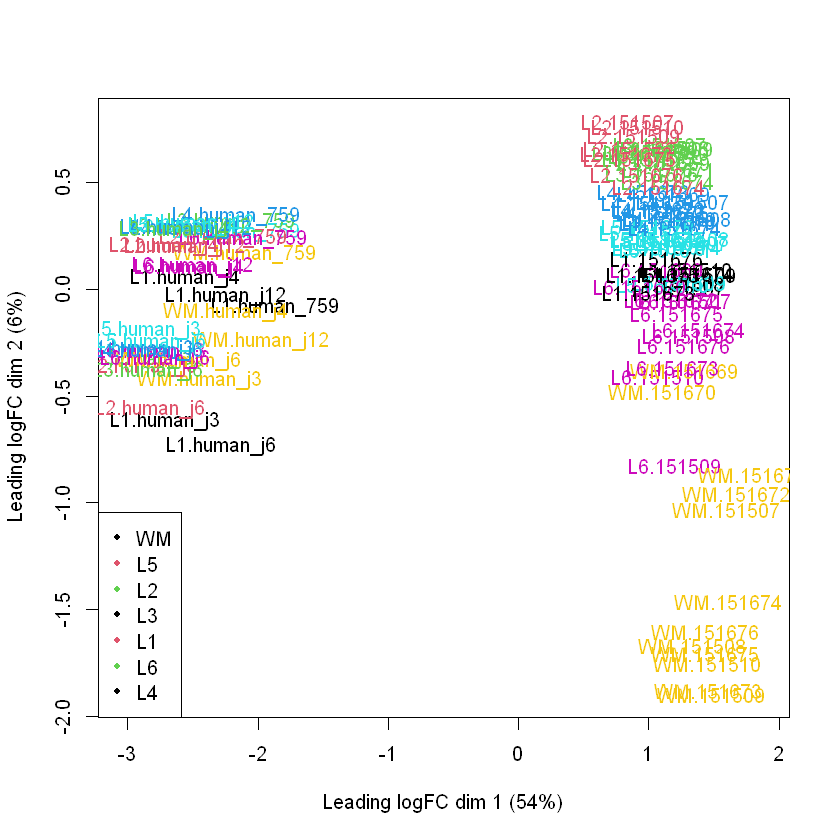

In [17]:
plotMDS(de_exp_table, col=as.numeric(annotation$layer))
legend("bottomleft", as.character(unique(annotation$layer)), col=1:3, pch=20)

### Estimating the Dispersion

In [18]:
group <- paste0(annotation$layer, ".", annotation$condition)
design <- model.matrix(~0 + group)

In [19]:
de_exp_table <- estimateDisp(de_exp_table, design = design)

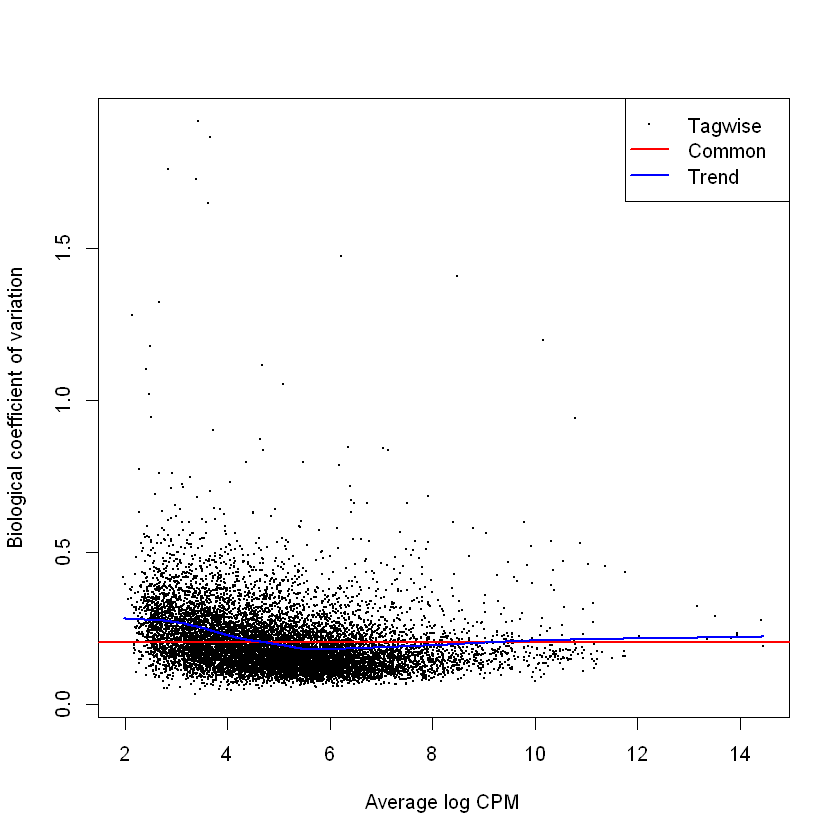

In [20]:
plotBCV(de_exp_table)

In [21]:
fit <- glmQLFit(de_exp_table, design)

In [22]:
head(fit$coefficients)

,groupL1.human,groupL1.spatial_libd_human,groupL2.human,groupL2.spatial_libd_human,groupL3.human,groupL3.spatial_libd_human,groupL4.human,groupL4.spatial_libd_human,groupL5.human,groupL5.spatial_libd_human,groupL6.human,groupL6.spatial_libd_human,groupWM.human,groupWM.spatial_libd_human
A1BG,-9.965626,-9.996600,-9.557867,-9.846505,-9.463524,-10.084354,-9.450815,-10.149275,-9.632839,-10.102653,-9.684106,-9.918133,-9.894350,-9.441897
A2M,-8.980301,-8.494396,-9.634981,-9.021977,-9.702448,-9.046944,-9.677554,-9.090237,-9.604174,-9.176838,-9.410549,-9.155550,-8.952056,-8.937930
AAAS,-10.985821,-11.042110,-10.956412,-11.124250,-11.149975,-11.082113,-11.176469,-10.998856,-11.203367,-11.157523,-11.101985,-10.962631,-10.973697,-10.608366
AACS,-10.344284,-10.011212,-10.228740,-9.805731,-10.140898,-9.729866,-10.138774,-9.799560,-10.048656,-9.721794,-10.047442,-9.770219,-10.213613,-10.185831
AADAT,-10.252720,-11.612706,-10.072069,-11.359289,-10.100678,-11.349797,-10.231519,-11.767520,-10.442742,-11.648778,-10.464552,-11.567818,-10.658164,-11.631985
AAGAB,-10.859397,-10.353707,-10.619697,-10.181813,-10.472640,-10.121952,-10.608948,-10.020550,-10.601619,-10.155279,-10.660309,-10.200892,-10.767966,-10.509270


### DE test

In [42]:
de_per_layer <- list()
for (layer in unique(annotation$layer)) {
    print(layer)
    myContrast <- makeContrasts(paste0("group", layer, ".human", "-group", layer, ".spatial_libd_human"), levels=design)
    qlf <- glmQLFTest(fit, contrast=myContrast)
    summary(decideTests(qlf))
    tt <- topTags(qlf, n = Inf)
    filename <- paste0("../../results/DiffExpr/young_vs_old/edgeR/", layer, "_DE.csv")
    write.table(tt$table, file=filename, row.names=TRUE, sep=",", quote=FALSE)
}

[1] "WM"
[1] "L5"
[1] "L2"
[1] "L3"
[1] "L1"
[1] "L6"
[1] "L4"
